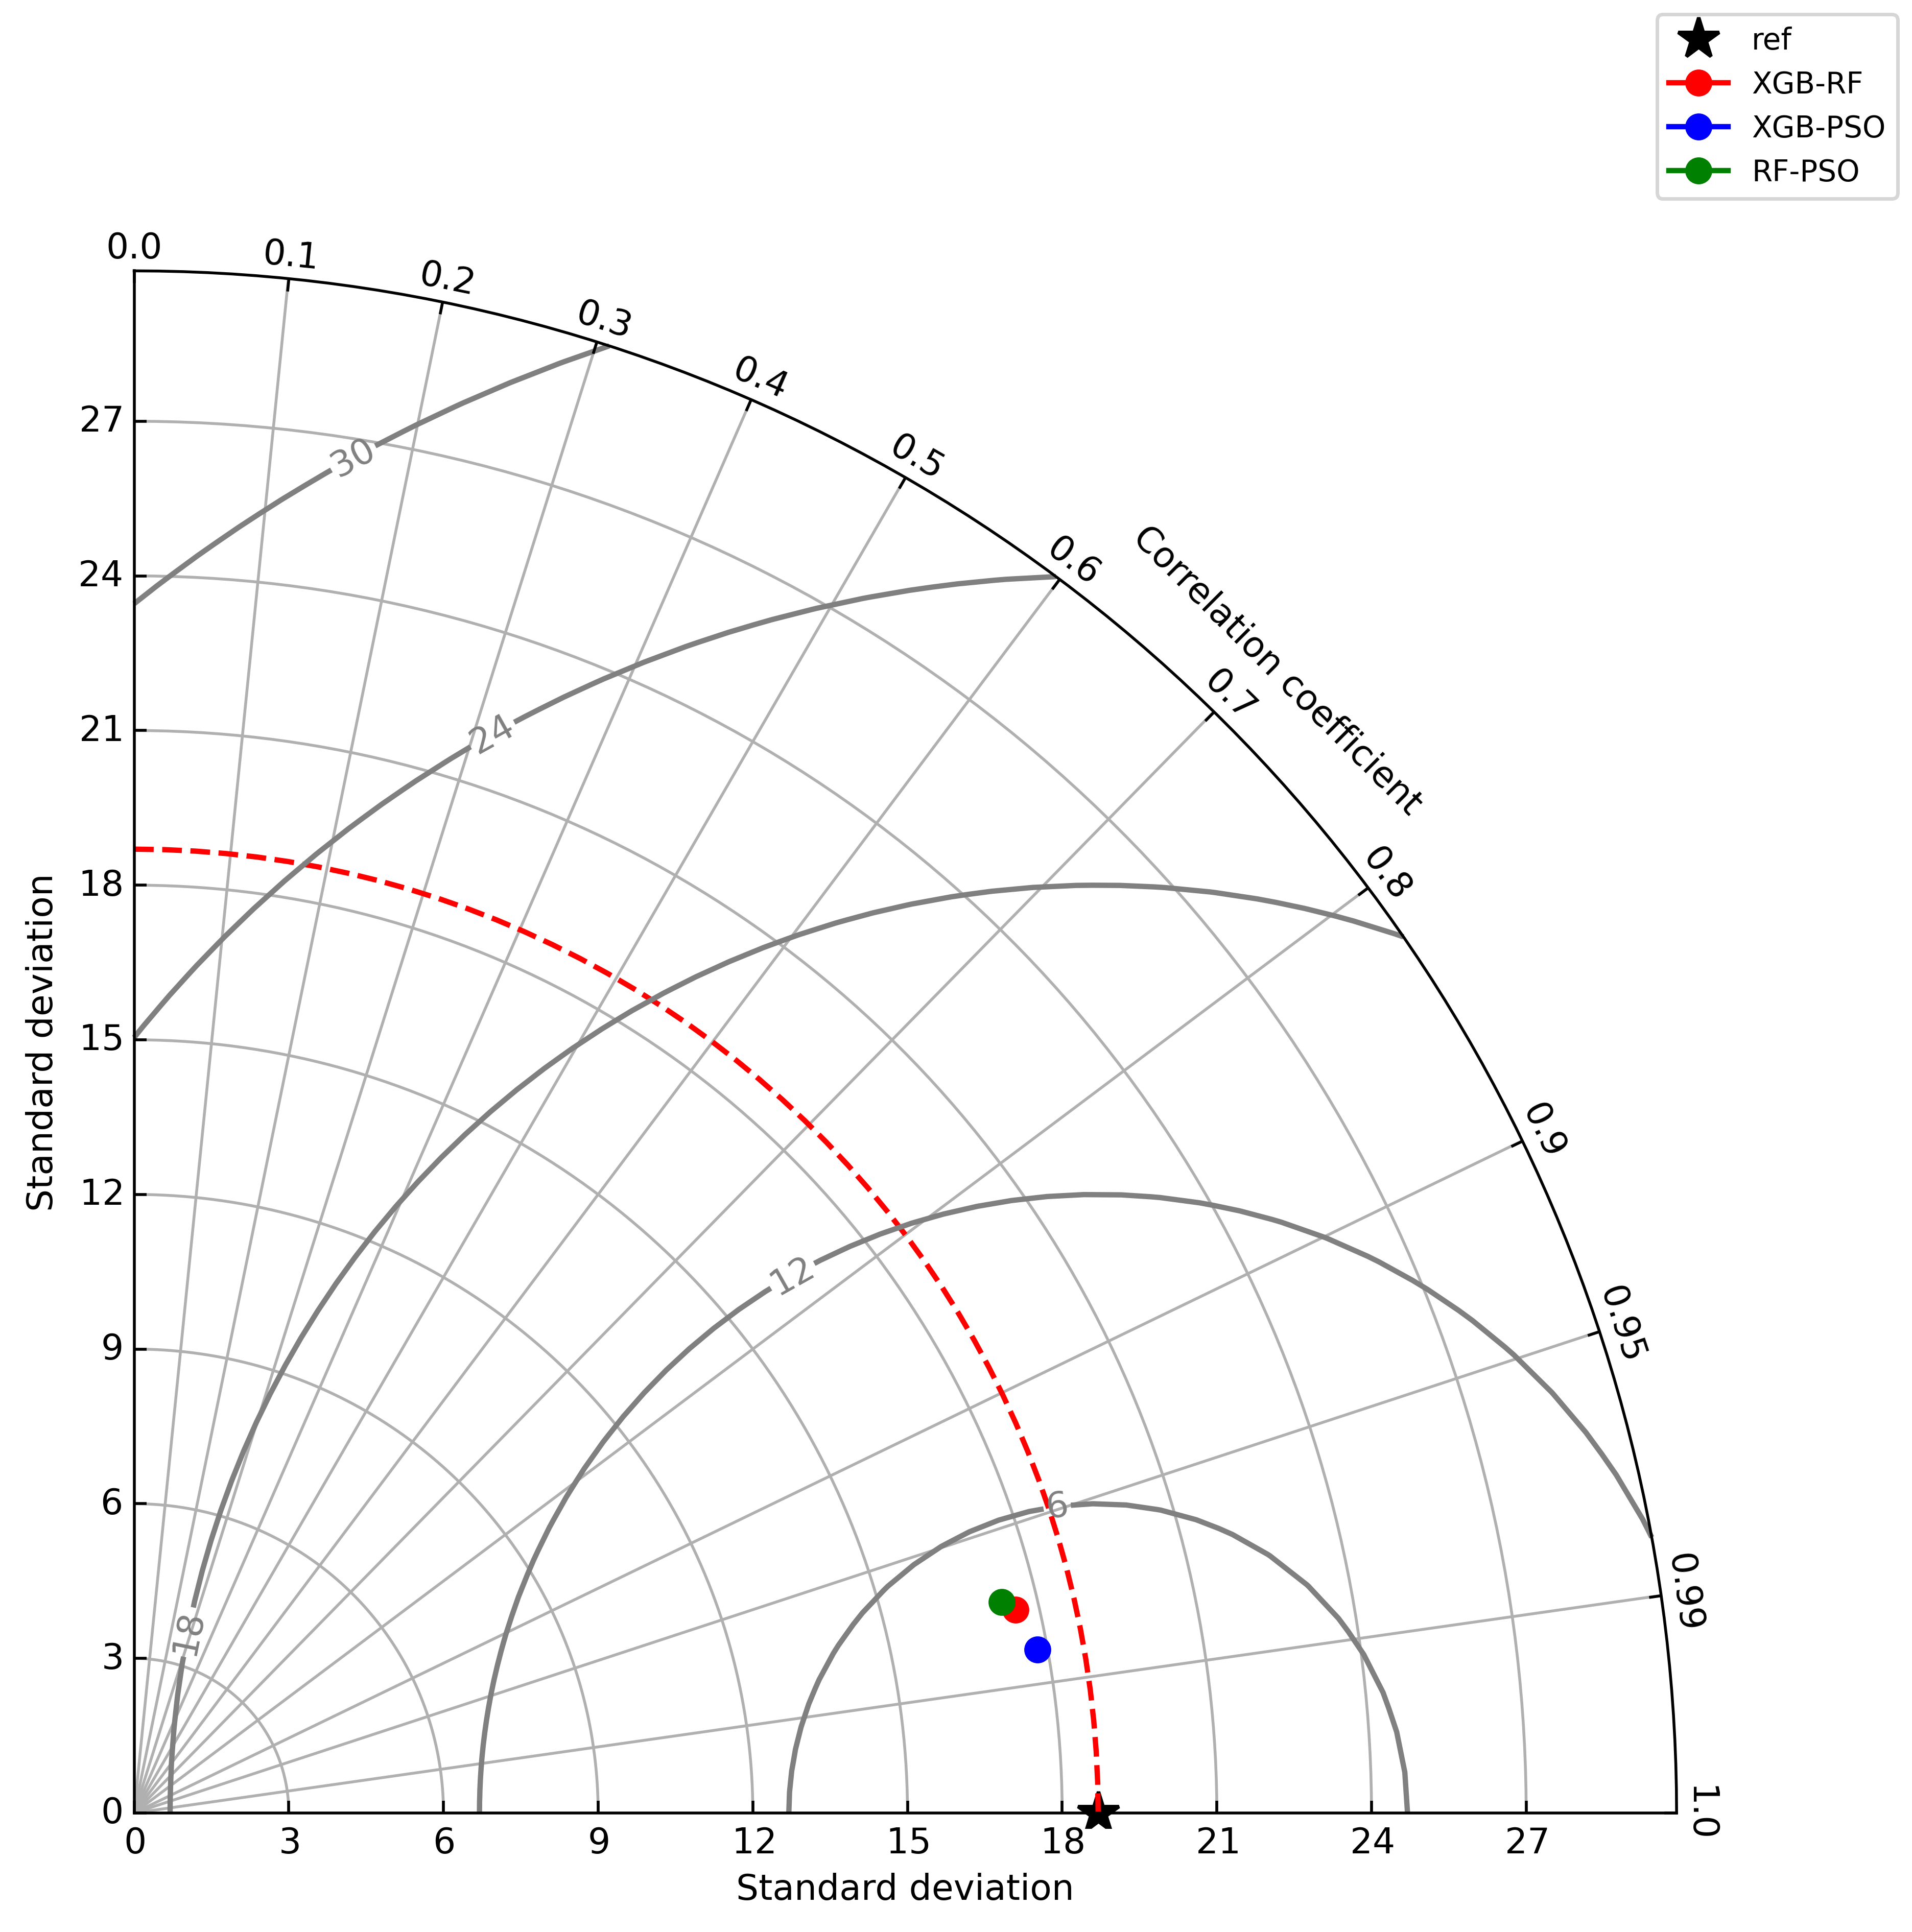

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa
import pandas as pd

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = 1.6 * self.STD
        gh = fa.GridHelperCurveLinear(tr, extremes=(0, (np.pi / 2), self.smin, self.smax), grid_locator1=gl1, tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Useless
        ax.axis['bottom'].set_visible(False)
        # Contours along standard deviations
        ax.grid()
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates
        # Add reference point and STD contour
        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'r--', label='_')
        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(8, 8), dpi=500)
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)

    colors = ['red', 'blue', 'green', 'purple', 'orange']
    srlc = zip(s, r, l, colors)

    for i in srlc:
        dia.add_sample(i[0], i[1], label=i[2], marker='o', color=i[3], mec=i[3], mfc=i[3], mew=1.6)

    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc='upper right')
    plt.grid(True)
    plt.show()

# Load the CSV file
file_path = 'Test.csv'
data = pd.read_csv(file_path)

# Calculate standard deviations and correlations
experimental = data['Experimental']
methods = data.columns[1:]

std_devs = data[methods].std().tolist()
correlations = data[methods].corrwith(experimental).tolist()

# Prepare the labels
labels = methods.tolist()

# Experimental standard deviation
obsSTD = experimental.std()

# Plot the Taylor diagram with the calculated values
srl(obsSTD, std_devs, correlations, labels, 'TaylorDiagram.jpg')

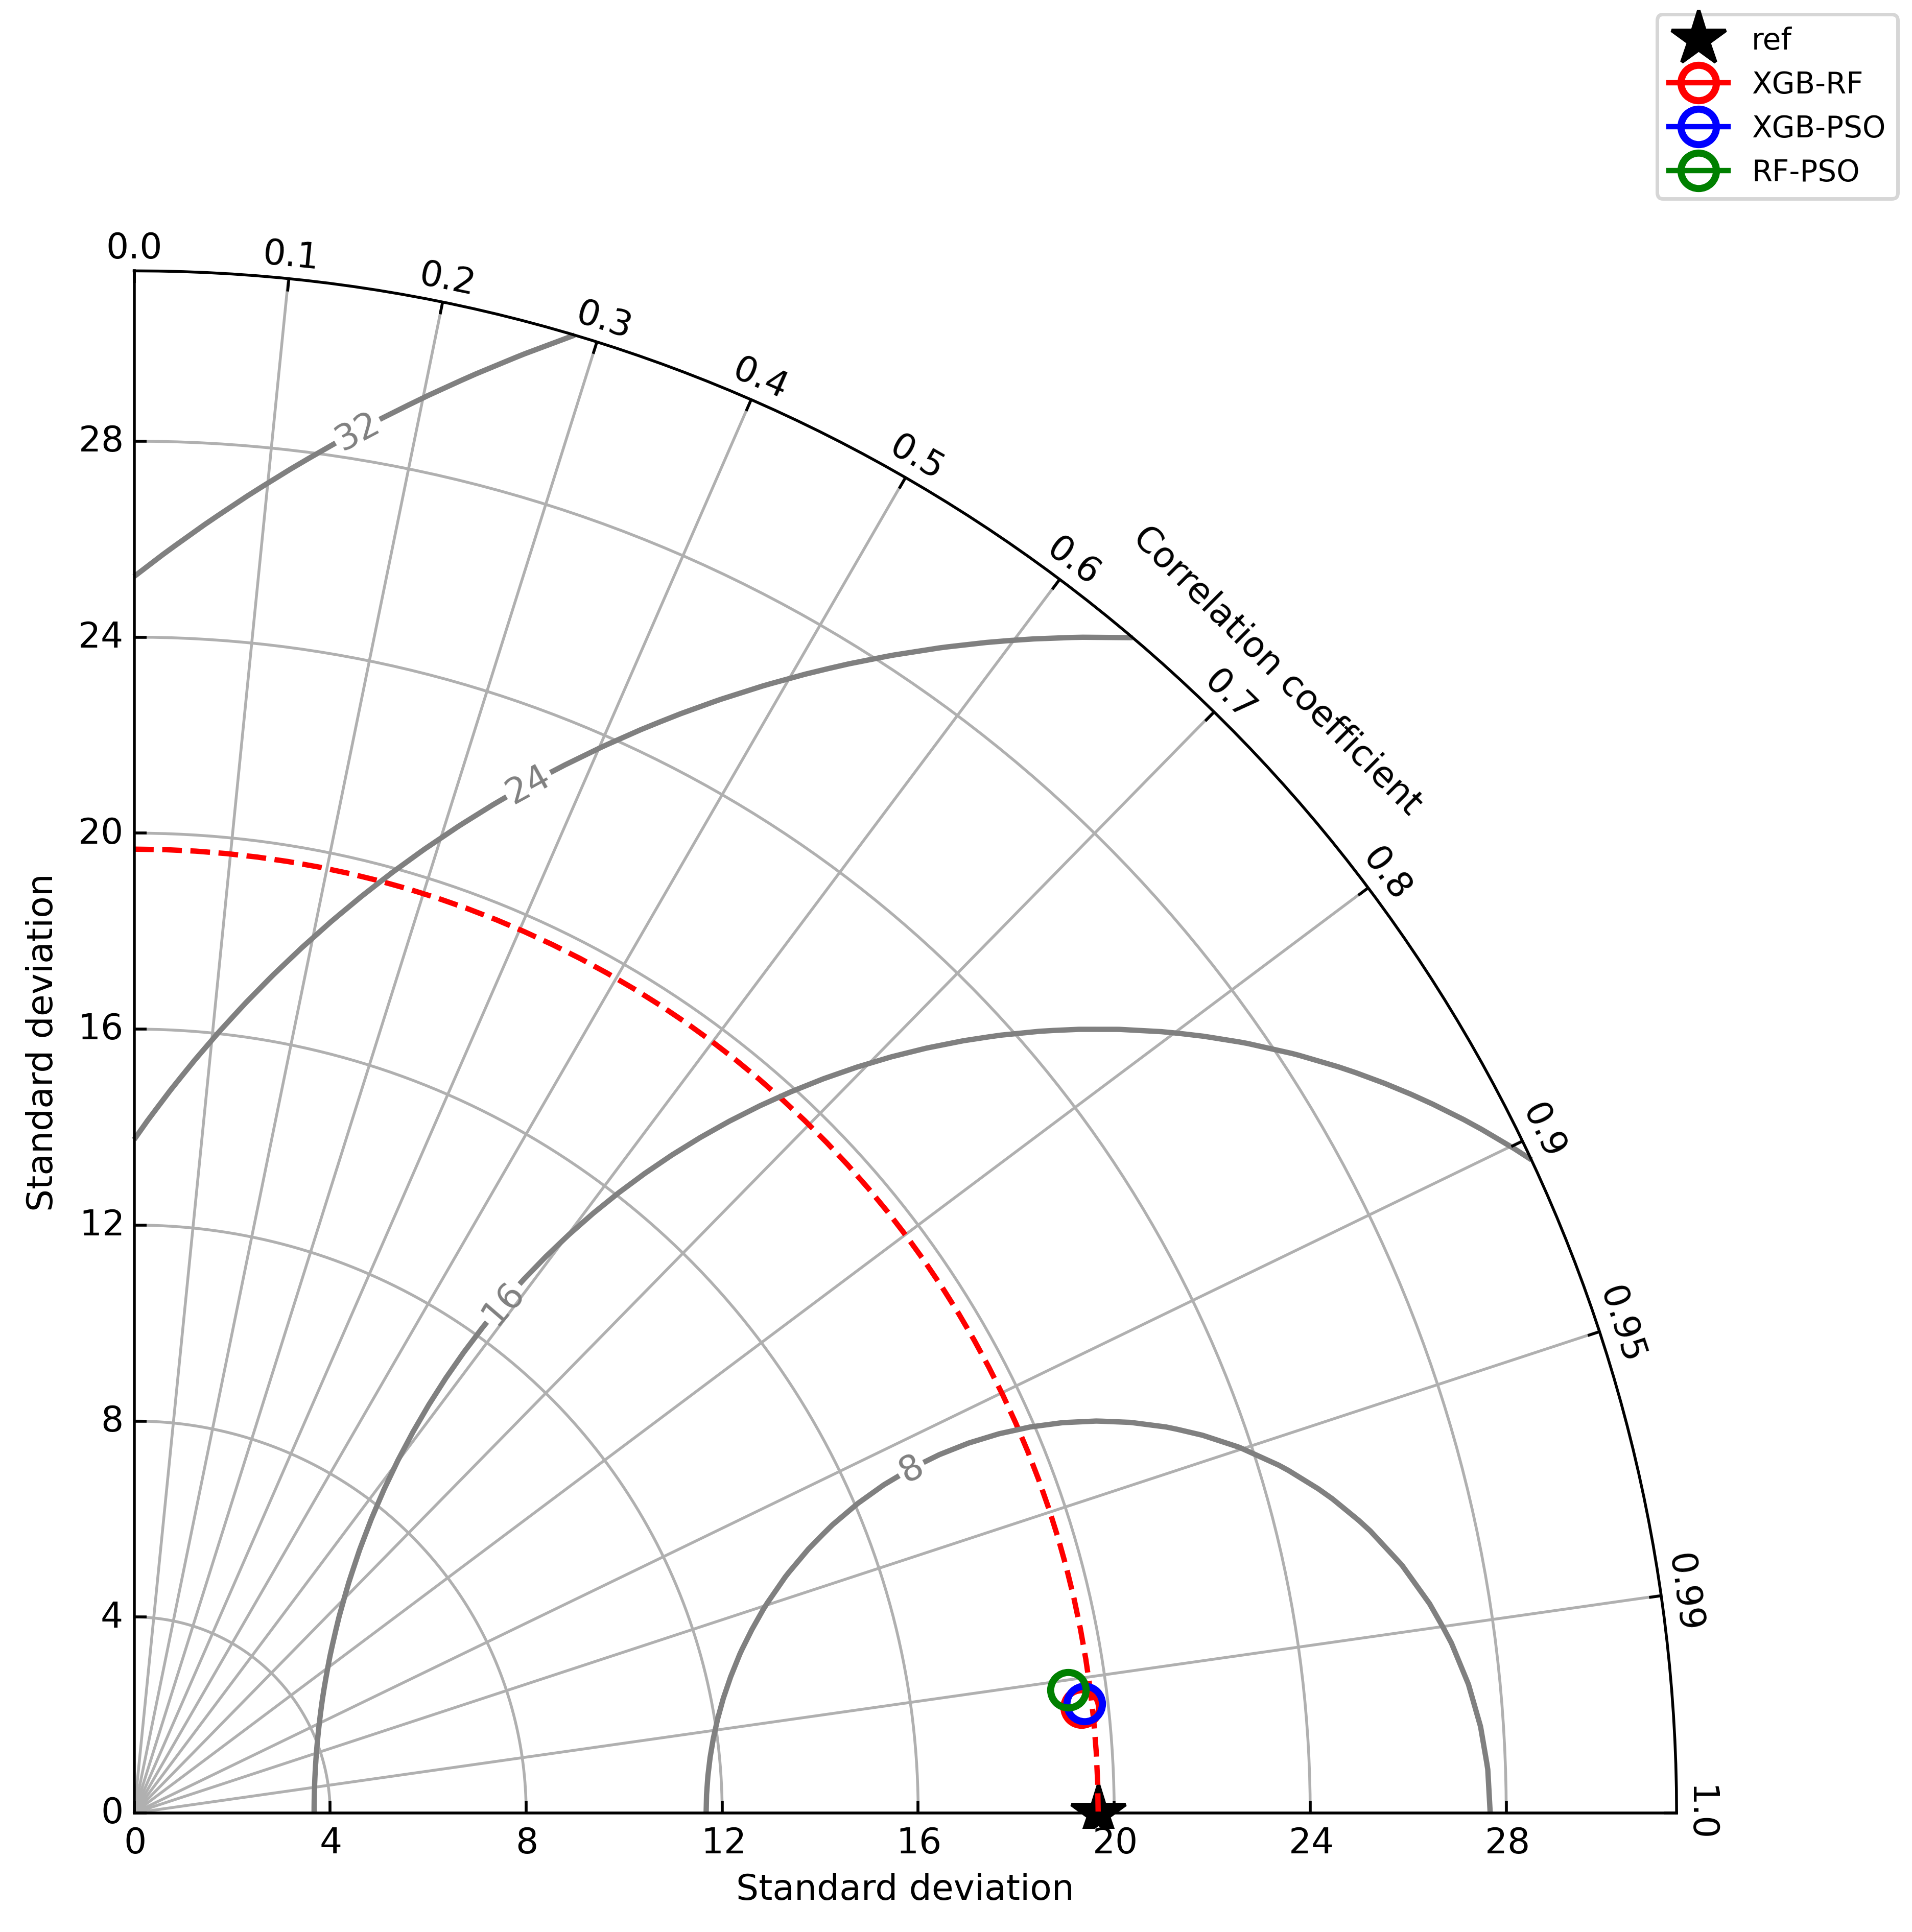

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa
import pandas as pd

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs)
        gl1 = gf.FixedLocator(tlocs)
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        self.smin = 0
        self.smax = 1.6 * self.STD
        gh = fa.GridHelperCurveLinear(tr, extremes=(0, (np.pi / 2), self.smin, self.smax), grid_locator1=gl1, tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        ax.axis['bottom'].set_visible(False)
        ax.grid()
        self._ax = ax
        self.ax = ax.get_aux_axes(tr)
        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=16, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'r--', label='_')
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, *args, **kwargs)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(8, 8), dpi=500)
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)

    colors = ['red', 'blue', 'green', 'purple', 'orange']
    srlc = zip(s, r, l, colors)

    for i in srlc:
        dia.add_sample(i[0], i[1], label=i[2], marker='o', color=i[3], mec=i[3], mfc='none', mew=2.0, ms=10)

    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc='upper right')
    plt.grid(True)
    plt.savefig(fname)
    plt.show()

# Load the CSV file
file_path = '/mnt/data/train.csv'
data = pd.read_csv(file_path)

# Calculate standard deviations and correlations
experimental = data['Experimental']
methods = data.columns[1:]

std_devs = data[methods].std().tolist()
correlations = data[methods].corrwith(experimental).tolist()

# Prepare the labels
labels = methods.tolist()

# Experimental standard deviation
obsSTD = experimental.std()

# Plot the Taylor diagram with the calculated values
srl(obsSTD, std_devs, correlations, labels, '/mnt/data/TaylorDiagram.jpg')
